#Importing the libraries

In [ ]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

file_veg="veg_menu_nov.csv"
file_path_veg = f"/content/drive/My Drive/dv_dataset/{file_veg}"


file_nonveg="nonveg_menu_nov.csv"
file_path_nonveg = f"/content/drive/My Drive/dv_dataset/{file_nonveg}"




#Loading the dataset for VEG MENU

In [ ]:
menu = pd.read_csv(file_path_nonveg)
menu.head()

,Category,item,sodium(mg),carbohydrates(g),protein(g),iron(mg),calcium(mg)
0,Breakfast,Puri,188.0,7.5,1.3,0.50,5.2
1,Breakfast,White Channa Masala,322.0,37.0,14.5,NaN,80.4
2,Breakfast,Millet Idly,272.0,63.0,10.0,9.30,17.0
3,Breakfast,Egg,130.0,1.0,6.0,1.75,50.0
4,Breakfast,Bread,97.0,11.2,2.0,1.00,0.0


#Shape of the dataset

In [ ]:
menu.shape

(37, 7)

In [ ]:
menu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          37 non-null     object 
 1   item              37 non-null     object 
 2   sodium(mg)        37 non-null     float64
 3   carbohydrates(g)  37 non-null     float64
 4   protein (g)       37 non-null     float64
 5   iron (mg)         36 non-null     float64
 6   calcium (mg)      37 non-null     float64
dtypes: float64(5), object(2)
memory usage: 2.1+ KB


In [ ]:
menu.isnull().sum()

Category            0
item                0
sodium(mg)          0
carbohydrates(g)    0
protein(g)          0
iron(mg)            1
calcium(mg)         0
dtype: int64

Analysis:


1.  The dataset has 37 records (menu items)
2.  5 out of 7 attributes have the datatype float64
3.  2 out of 7 attributes have the object datatype
4.  Total memory usage of the dataset = 2.1+ KB




#Effective Data Analysis

In [ ]:
#Gives the entire summary of the dataset
menu.describe()

,sodium(mg),carbohydrates(g),protein (g),iron (mg),calcium (mg)
count,37.000000,37.000000,37.000000,36.000000,37.000000
mean,444.233243,36.157838,11.310811,12.720833,15.016216
std,536.096262,27.945743,9.091351,23.940472,17.844023
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,50.000000,11.200000,3.000000,1.587500,2.000000
50%,291.000000,37.000000,10.000000,3.000000,9.000000
75%,500.000000,60.000000,14.500000,16.250000,21.400000
max,2300.000000,82.200000,37.000000,131.400000,80.400000


#Unique values in Category Column

In [ ]:
unique_menu_categories = menu['Category'].unique()
print(unique_menu_categories)


['Breakfast' 'Lunch' 'Dinner']


In [ ]:
category_counts = menu['Category'].value_counts()
print(category_counts)


Lunch        13
Breakfast    12
Dinner       12
Name: Category, dtype: int64


(array([0, 1, 2]),
 [Text(0, 0, 'Breakfast'), Text(1, 0, 'Lunch'), Text(2, 0, 'Dinner')])

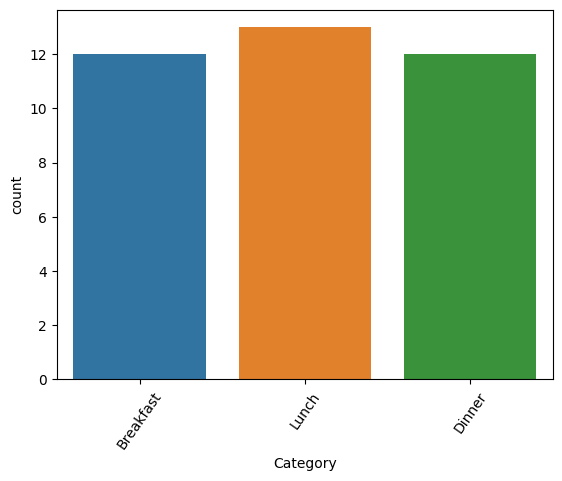

In [ ]:
sns.countplot(x='Category', data=menu)
plt.xticks(rotation=55)

Analysis:

1.  The different types of menus are - breakfast(12 items), lunch(13 items),dinner (12 items)


#Visualize Average Nutritions Value per Category

In [ ]:
# Make a lis of all nutritions which u want to visualize
nutritions = ['protein(g)', 'carbohydrates(g)',
              'sodium(mg)', 'iron(mg)', 'calcium(mg)']


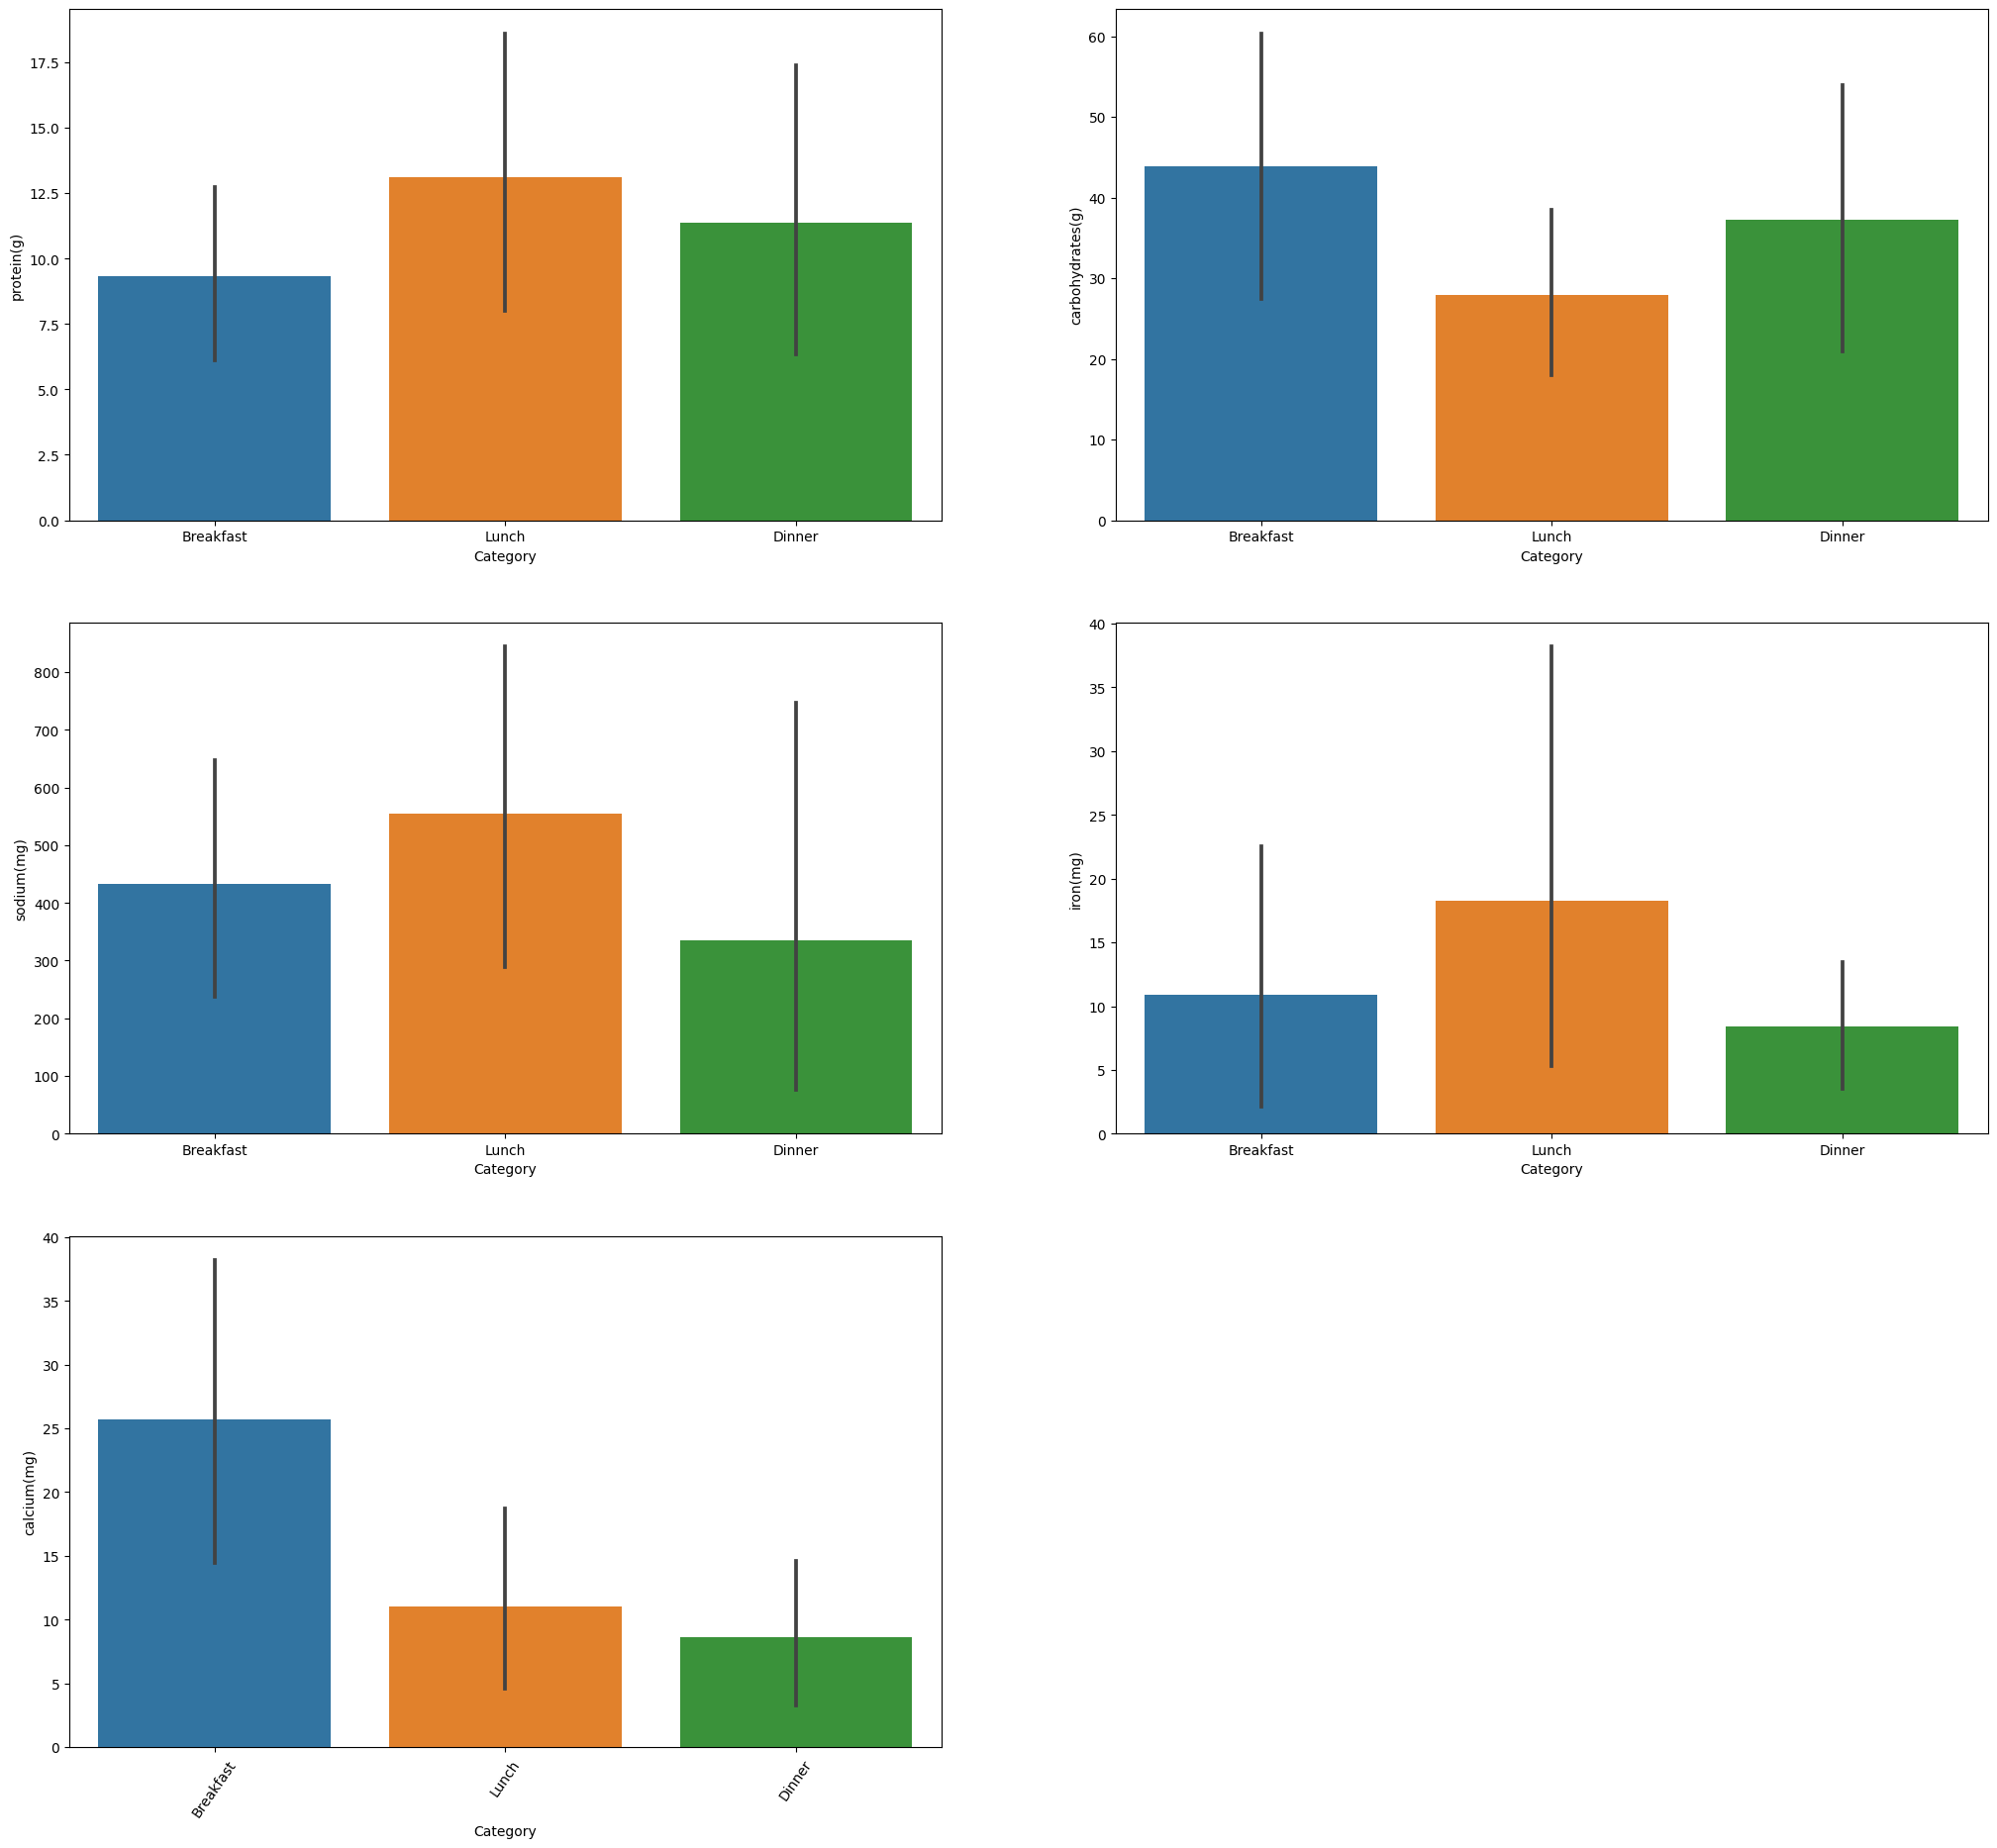

In [ ]:
plt.figure(figsize = (25,55))
for i, ntr in enumerate(nutritions):
    plt.subplot(7, 2, i+1)
    sns.barplot(x='Category', y=ntr, data=menu)
plt.xticks(rotation=55)
plt.show()

In [ ]:
# Texual Description about above visualization
for ntr in nutritions:
    temp_list = menu.pivot_table(ntr, 'Category').sort_values(by=ntr, ascending=False)
    print('{}'.format(temp_list[:7]))
    print('-----------------------------------------------------')

           protein(g)
Category             
Lunch       13.092308
Dinner      11.383333
Breakfast    9.308333
-----------------------------------------------------
           carbohydrates(g)
Category                   
Breakfast         43.925000
Dinner            37.295000
Lunch             27.938462
-----------------------------------------------------
           sodium(mg)
Category             
Lunch      554.594615
Breakfast  433.250000
Dinner     335.658333
-----------------------------------------------------
            iron(mg)
Category            
Lunch      18.269231
Breakfast  10.859091
Dinner      8.416667
-----------------------------------------------------
           calcium(mg)
Category              
Breakfast    25.741667
Lunch        11.000000
Dinner        8.641667
-----------------------------------------------------


Analysis:

1. The above code cell prints top 3 categorical source for each nutrition listed
2. Also by onserving graphs we can get rich source of each nutrition

#Plot Average Carbohydrates each Category contains

(array([0, 1, 2]),
 [Text(0, 0, 'Breakfast'), Text(1, 0, 'Lunch'), Text(2, 0, 'Dinner')])

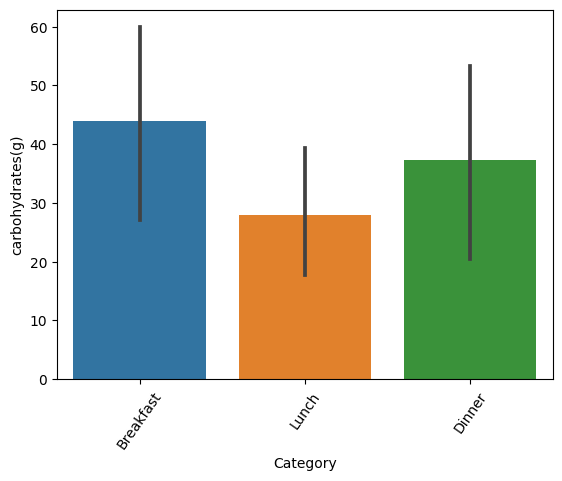

In [ ]:
sns.barplot(x='Category', y='carbohydrates(g)', data=menu)
plt.xticks(rotation=55)

Analysis:

1.  The above graph shows the carbohydrates that each type of menu has on an average.

*   breakfast - around 42g
*   lunch - around 27g
*   dinner - around 37g



#Plot which items contains which nutritions

In [ ]:
# A function which can plot N Items which contains highest nutrition
# Change value of N as per convenience in visualization

def plot_item_vs_nutrition(menu, nutrition, n):
    top_n_items = menu.groupby('item')[nutrition].sum().nlargest(n)


   # Print maximum and minimum values along with corresponding item names
    max_item = top_n_items.idxmax()
    min_item = top_n_items.idxmin()
    max_value = top_n_items.max()
    min_value = top_n_items.min()

    print(f"Item with Maximum {nutrition}: {max_item} ({max_value})")
    print(f"Item with Minimum {nutrition}: {min_item} ({min_value})")

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_n_items.values, y=top_n_items.index, orient='h')
    plt.xlabel(nutrition)
    plt.ylabel('Menu Item')
    plt.title(f'Top {n} Items based on {nutrition}')
    plt.show()

Item with Maximum protein(g): Chicken Curry (37.0)
Item with Minimum protein(g): Rasam (0.0)


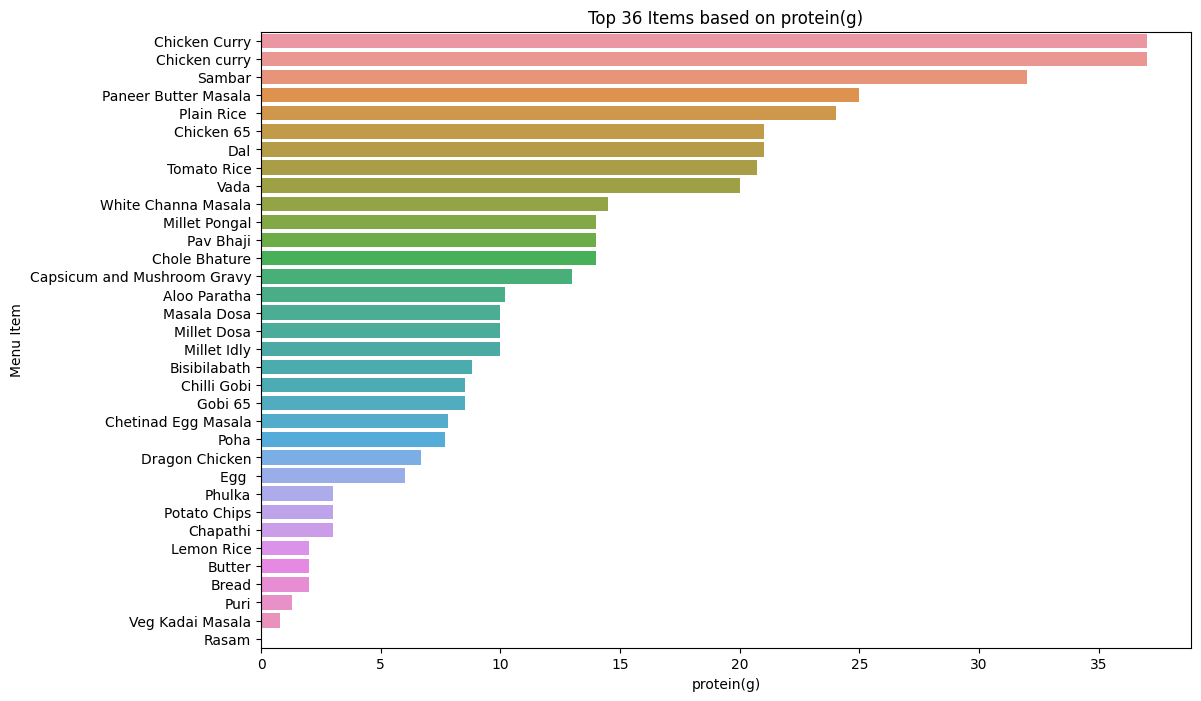

In [ ]:
# Let's Start with protein
plot_item_vs_nutrition(menu,'protein(g)', len(menu) - 1)

Item with Maximum carbohydrates(g): Sambar (102.0)
Item with Minimum carbohydrates(g): Egg  (1.0)


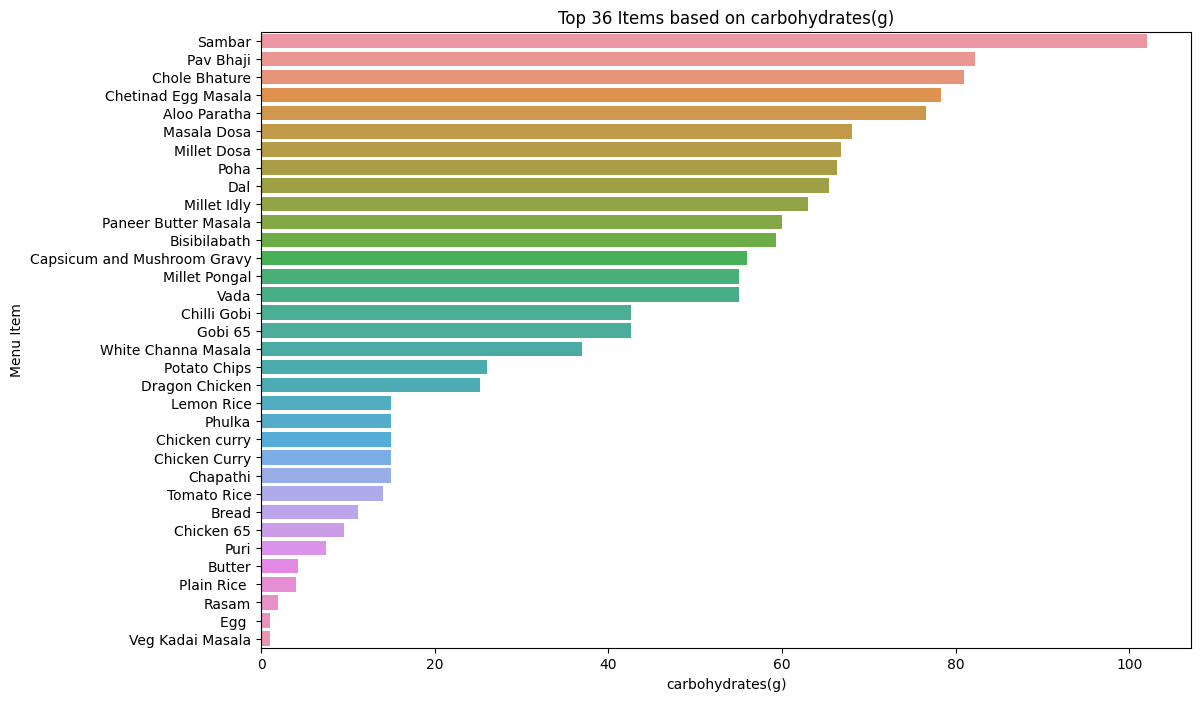

In [ ]:
plot_item_vs_nutrition(menu,'carbohydrates(g)', len(menu) - 1)

Item with Maximum sodium(mg): Capsicum and Mushroom Gravy (2300.0)
Item with Minimum sodium(mg): Potato Chips (0.0)


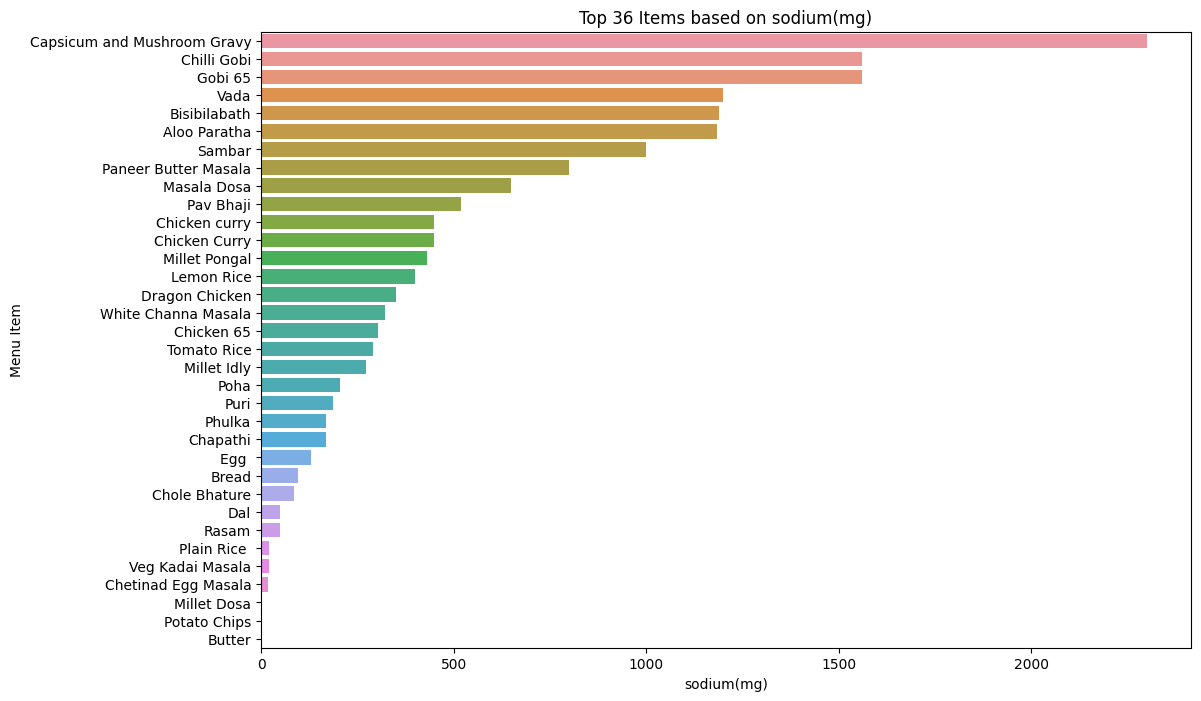

In [ ]:
plot_item_vs_nutrition(menu,'sodium(mg)', len(menu) - 1)

Item with Maximum iron(mg): Tomato Rice (131.4)
Item with Minimum iron(mg): Chole Bhature (0.0)


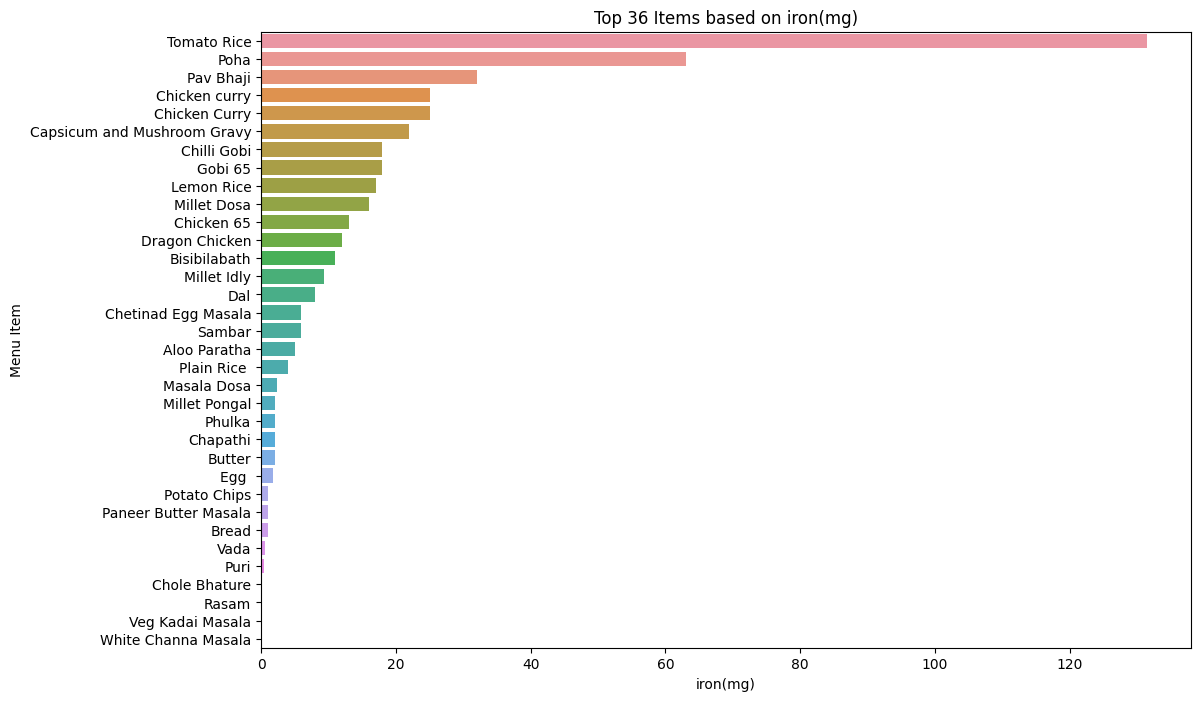

In [ ]:
plot_item_vs_nutrition(menu,'iron(mg)', len(menu) - 1)

Item with Maximum calcium(mg): White Channa Masala (80.4)
Item with Minimum calcium(mg): Plain Rice  (0.0)


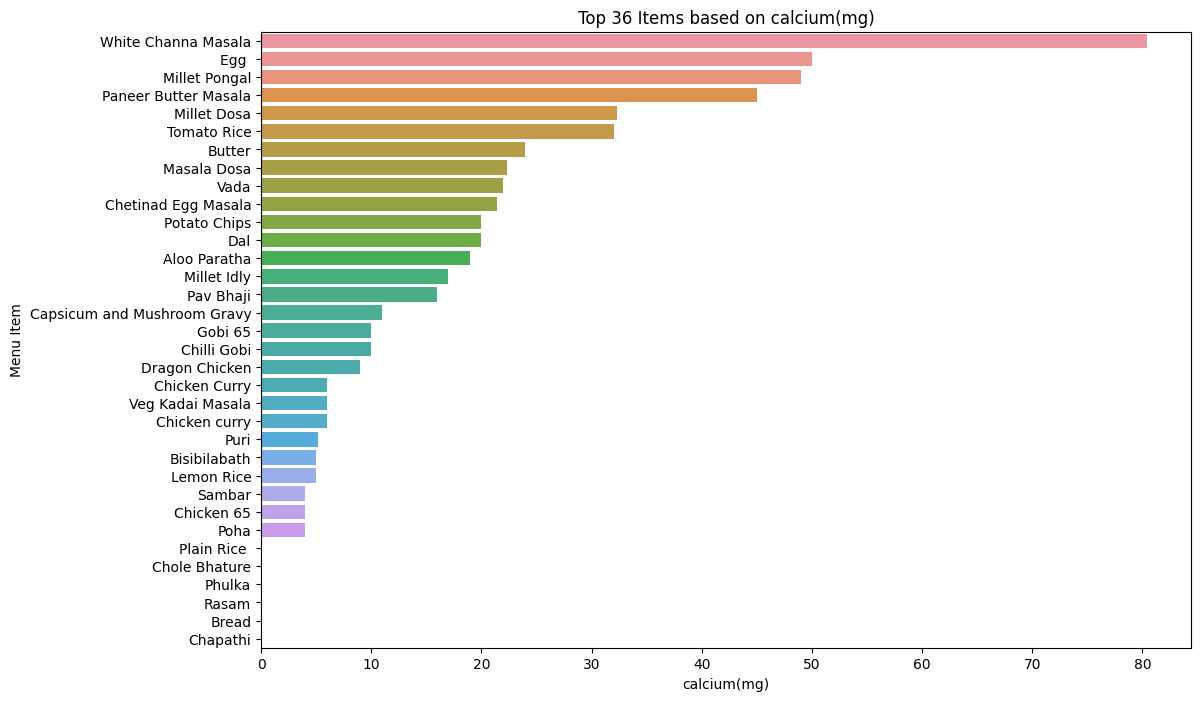

In [ ]:
plot_item_vs_nutrition(menu,'calcium(mg)', len(menu) - 1)

In [ ]:
import pandas as pd

final_df = pd.DataFrame({'Nutrient': ['Carbohydrates', 'Protein', 'Sodium', 'Iron' , 'Calcium', ], 'Official Requirement': ['200-300', '100-120', '40-50', '30-40', '7-10'], 'Hostel Nutrition': [109.145, 33.073, 13.289, 37.529, 4.520], 'Combined Menu Nutrition Value of Fast Food Joint': [205.47, 50.42, 27, 32,8.8]})

display(final_df)

,Nutrient,Official Requirement,Hostel Nutrition,Combined Menu Nutrition Value of Fast Food Joint
0,Carbohydrates,200-300,109.145,205.47
1,Protein,100-120,33.073,50.42
2,Sodium,40-50,13.289,27.00
3,Iron,30-40,37.529,32.00
4,Calcium,7-10,4.520,8.80


## Conclusion

As you can see from the above table, the nutritional value provided by the hostel mess is below the requirements whereas the nutritional value provided by the fast food menu is over the required limit in some categories.

Hence there can be improvements made to allow the Hostel Authorities in creating a safe and more nutritious food menu for all the students.

The differences in nutritional values for hostel menu are mentioned below: -



1.   Protein - ~80g
2.   Sodium - ~40mg
3. Carbohydrates - ~100g
4. Iron - within range
5. Calcium - ~4mg

The differences in nutritional values for fast-food menu are mentioned below: -



1.   Protein - ~50g
2.   Sodium - ~20mg
3. Carbohydrates - within range
4. Iron - within range
5. Calcium - within range
